In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
data = load_boston()
X = data.data
y = data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
import pandas as pd

In [4]:
y = list(y)
for i in range(len(y)):
  idx = y.index(min(y))
  if i < len(y)/3:
    y[idx] = 100
  elif i > len(y)/3 and i < 2*(len(y)/3):
    y[idx] = 200
  else:
    y[idx] = 300

def split_equally(y):
  if y == 100:
    return 0
  elif y == 200:
    return 1
  else:
    return 2

y_data = list(map(split_equally, y))

In [5]:
X = pd.DataFrame(X)
y = pd.DataFrame(y_data)

In [6]:
#1. Split the data in 70/30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
#2. Use Decision Tree Classifier. Train a supervised learning model to generate predictions.
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
predict = dt.predict(X_test)

In [8]:
#3. Report the tree depth, number of leaves, feature importance, train score and test score
Td = dt.get_depth()
print("The depth of the tree : ", Td)
print("\nNumber of leaves : ", dt.get_n_leaves())
print("\nFeature Importance : ", dt.feature_importances_)
print("\nTrain Score : ", dt.score(X_train, y_train))
print("\nTest Score : ", dt.score(X_test, y_test))

The depth of the tree :  13

Number of leaves :  62

Feature Importance :  [0.07152736 0.         0.05491654 0.00636614 0.05510525 0.26071412
 0.07746326 0.03779531 0.02088058 0.01450709 0.01480504 0.06238938
 0.32352992]

Train Score :  1.0

Test Score :  0.6776315789473685


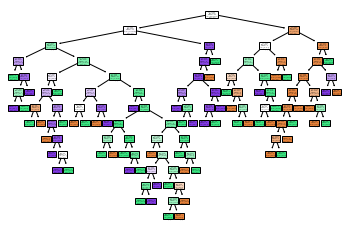

In [9]:
#4. Show visual output
plt.figure()
plot_tree(dt, feature_names= y_data, class_names=True, filled=True)
plt.show()

In [10]:
#5. Generate Td-1 decision tree on same training set. 
#6. For each (Td-1) report the scores

td_max = 0
dt_max = dt.fit(X_train, y_train)
for d in range(1, Td):
  dt = DecisionTreeClassifier(max_depth=d)
  dt = dt.fit(X_train, y_train)
  dt_predict = dt.predict(X_test)
  print("The depth of the tree : ", d)
  print("\nNumber of leaves : ", dt.get_n_leaves())
  print("\nFeature Importance : ", dt.feature_importances_)
  print("\nTrain Score : ", dt.score(X_train, y_train))
  print("\nTest Score : ", dt.score(X_test, y_test))
  if td_max < dt.score(X_test, y_test):
        td_max=dt.score(X_test, y_test)
        dt_max=dt


The depth of the tree :  1

Number of leaves :  2

Feature Importance :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Train Score :  0.5932203389830508

Test Score :  0.631578947368421
The depth of the tree :  2

Number of leaves :  4

Feature Importance :  [0.         0.         0.         0.         0.07577166 0.38065911
 0.         0.         0.         0.         0.         0.
 0.54356923]

Train Score :  0.7824858757062146

Test Score :  0.7236842105263158
The depth of the tree :  3

Number of leaves :  8

Feature Importance :  [0.         0.         0.         0.         0.06658292 0.33449703
 0.07117803 0.02511351 0.         0.         0.02497727 0.
 0.47765124]

Train Score :  0.8305084745762712

Test Score :  0.756578947368421
The depth of the tree :  4

Number of leaves :  14

Feature Importance :  [0.01371437 0.         0.01850522 0.         0.05978052 0.31588107
 0.06390617 0.03465203 0.         0.01168839 0.02242548 0.03059443
 0.42885232]

Train Score :  0.8531073446327684



In [28]:
#7. Visualize
import graphviz
from sklearn import tree
from io import StringIO
import pydotplus
from IPython.display import Image

def visualize_tree(dt, feature_name):
  dot_data = StringIO()
  tree.export_graphviz(dt, out_file=dot_data, feature_names = feature_name, 
                       class_names=True, filled = True,
                       rounded = True, special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data(dot_data.getvalue()))
  return Image(graph.create_png())



In [31]:
visualize_tree(dt, y_data)

ValueError: ignored

Highest test score with depth 3


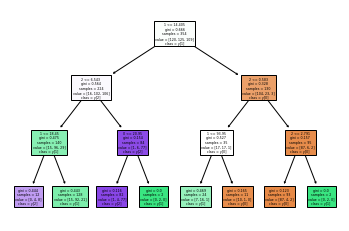

In [32]:
print("Highest test score with depth",dt_max.get_depth())
plt.figure()
plot_tree(dt_max, feature_names=y_data,class_names=True,filled=True)
plt.show()